## Gemstone Price Prediction

##### Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### 1) Problem Statement
The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):
- id : unique identifier of each diamond
- carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
- cut : Quality of Diamond Cut
- color : Color of Diamond
- clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
- depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
- table : A diamond's table is the facet which can be seen when the stone is viewed face up.
- x : Diamond X dimension
- y : Diamond Y dimension
- x : Diamond Z dimension

Target variable:
- price: Price of the given Diamond.

#### 2) Data Collection
- Dataset Source - https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv
- The data consists of 11 column and 193573 rows.

##### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Import the CSV Data as Pandas DataFrame

In [11]:
df = pd.read_csv("data/gemstone.csv")

##### Show Top 5 Records

In [12]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


##### Show Bottom 5 Records

In [13]:
df.tail()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681
193572,193572,0.71,Good,E,SI2,60.8,64.0,5.73,5.71,3.48,2258


##### Shape of the dataset

In [14]:
df.shape

(193573, 11)

##### Dataset Information

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


##### Drop id column as it is statistically insignificant

In [16]:
df = df.drop(columns=['id'], axis=1)

In [17]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


#### 3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

##### 3.1 Check Missing Values

In [18]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

##### Observations:-
- There are no missing values in the data set

##### 3.2 Check Duplicates

In [19]:
df.duplicated().sum()

0

##### Observations:-
- There are no duplicates values in the data set

##### 3.3 Check the data types

In [21]:
# Check Null and Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


##### 3.4 Checking the number of unique values of each column

In [22]:
df.nunique()

carat       248
cut           5
color         7
clarity       8
depth       153
table       108
x           522
y           521
z           349
price      8738
dtype: int64

##### 3.5 Check statistics of data set

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


##### 3.7 Exploring Data

In [24]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [25]:
print("Categories in 'cut' variable:     ",end=" " )
print(df['cut'].unique())

print("Categories in 'color' variable:  ",end=" ")
print(df['color'].unique())

print("Categories in'clarity' variable:",end=" " )
print(df['clarity'].unique())

Categories in 'cut' variable:      ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
Categories in 'color' variable:   ['F' 'J' 'G' 'E' 'D' 'H' 'I']
Categories in'clarity' variable: ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


In [27]:
# define numerical and categorical columns
numerical_columns = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_columns = [feature for feature in df.columns if df[feature].dtypes == 'O']

# print columns
print("We have {} numerical features : {}".format(len(numerical_columns), numerical_columns))
print("We have {} categorical features : {}".format(len(categorical_columns), categorical_columns))

We have 7 numerical features : ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
We have 3 categorical features : ['cut', 'color', 'clarity']


#### Univariate Analysis of Numerical columns

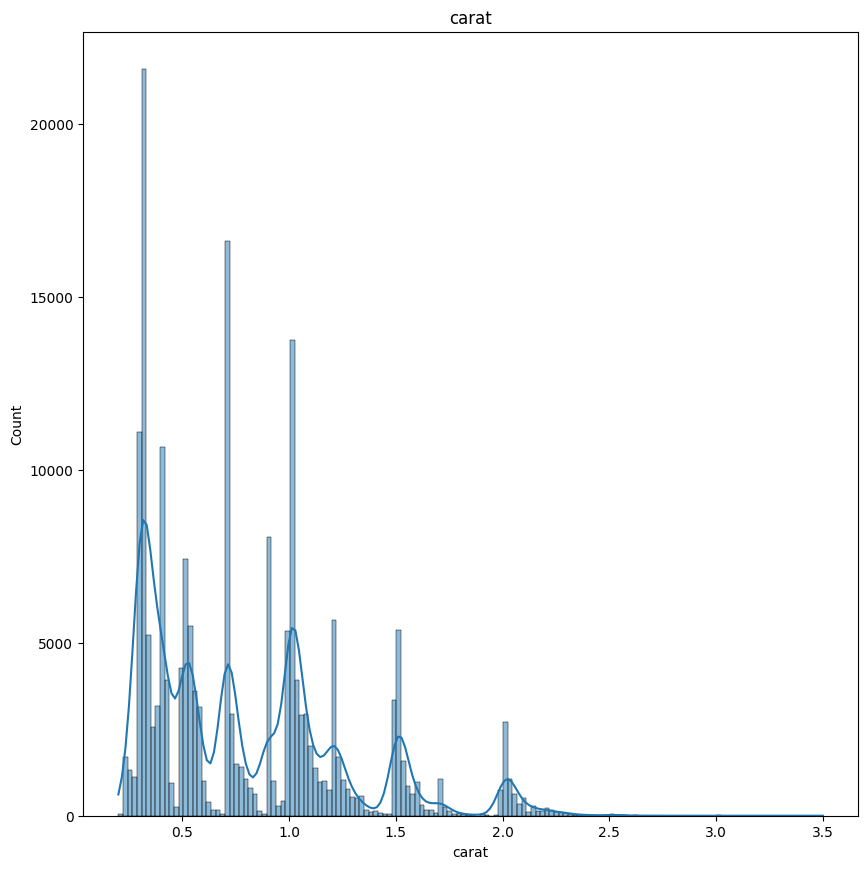

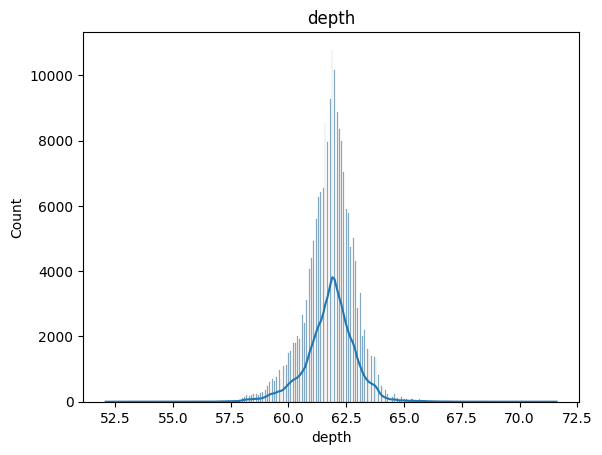

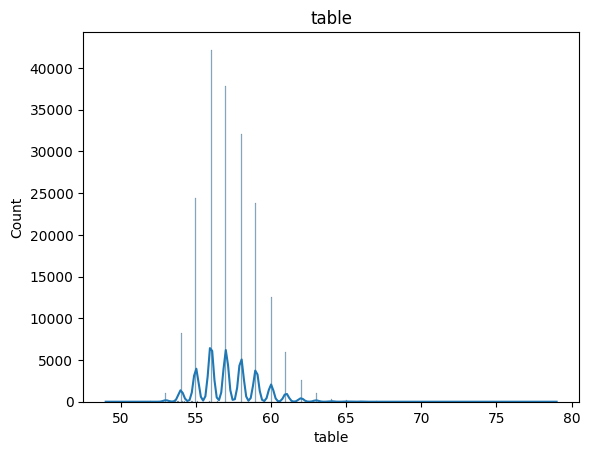

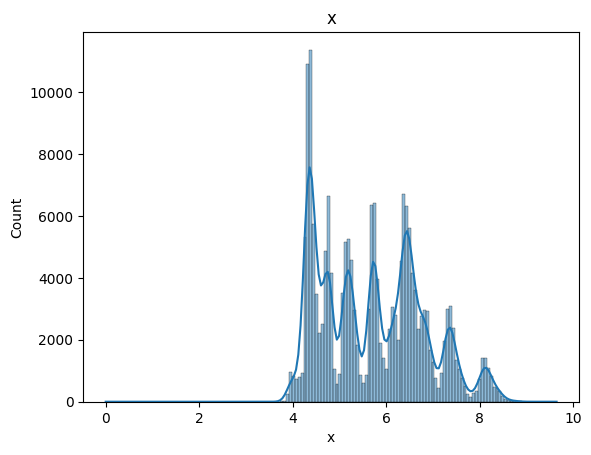

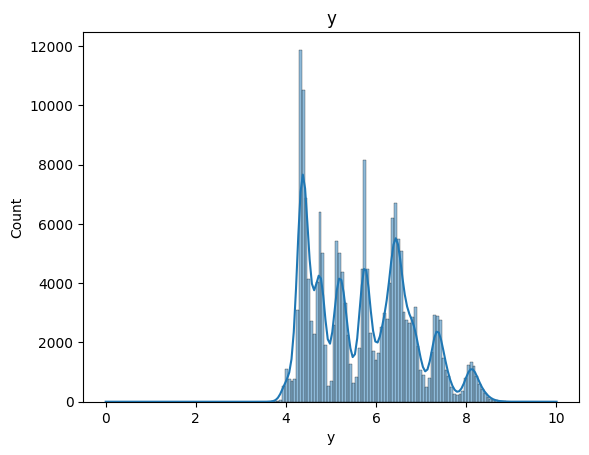

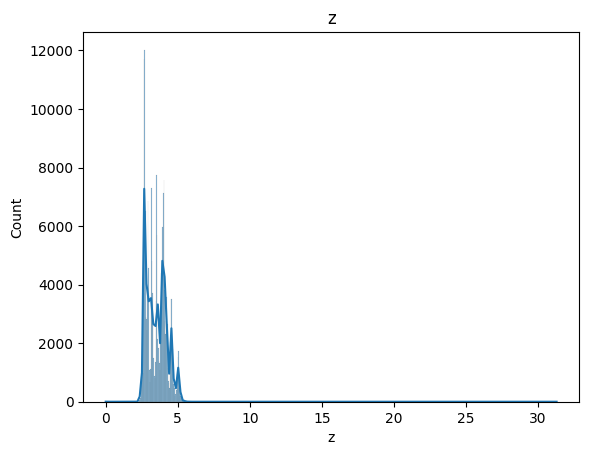

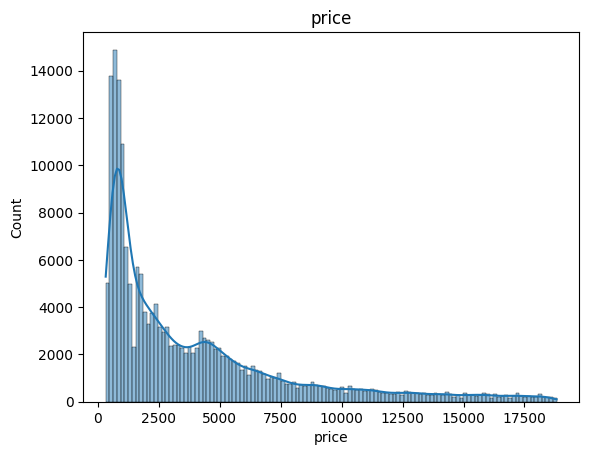

In [30]:
plt.figure(figsize=(10,8))
plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in numerical_columns:
    sns.histplot(data=df, x = i, kde=True)
    plt.title(i)
    plt.show()

#### Univariate Analysis of Categorical columns

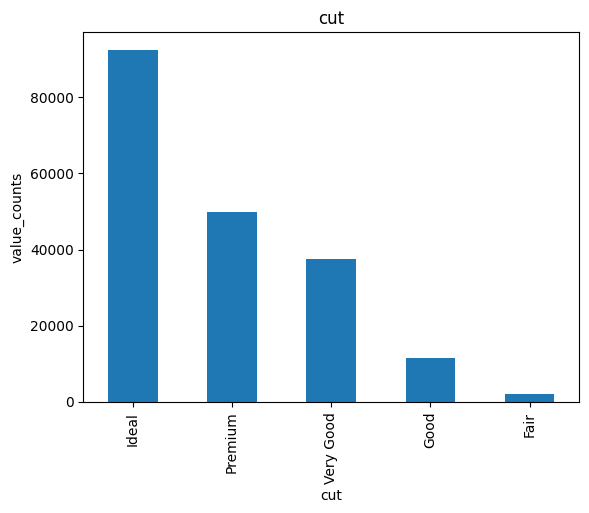

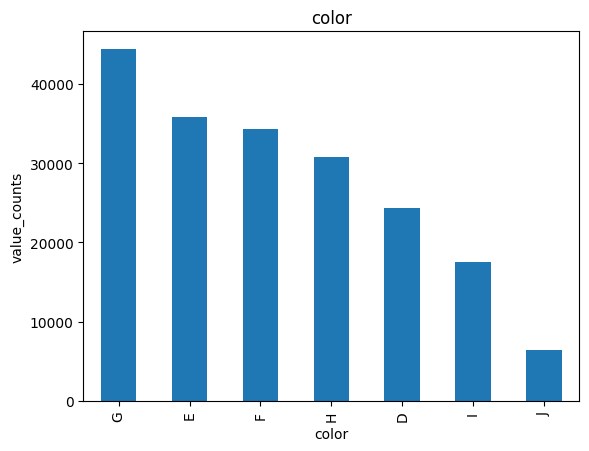

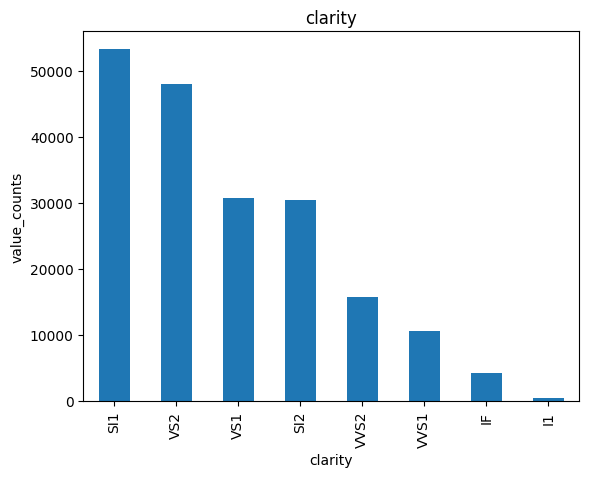

In [31]:
for i in categorical_columns:
    df[i].value_counts().plot(kind="bar", xlabel = i, ylabel='value_counts', title = i)
    print('\n')
    plt.show()

#### Bivariate Analysis with Visualization

##### Correlation heatmap

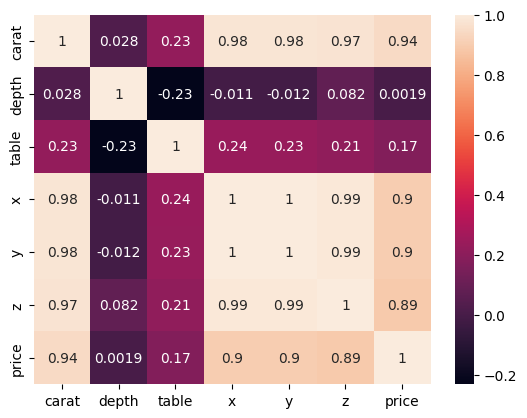

In [32]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

##### Pairplot

In [33]:
sns.pairplot(df,diag_kind='kde')
plt.show()

AttributeError: 'str' object has no attribute 'copy'

##### Categorical Features vs Target Feature Price Boxplot

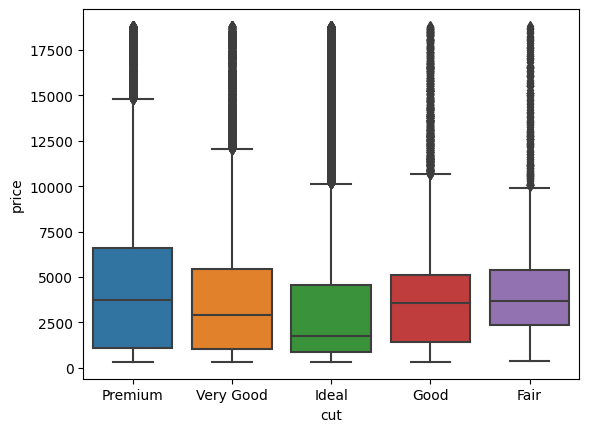

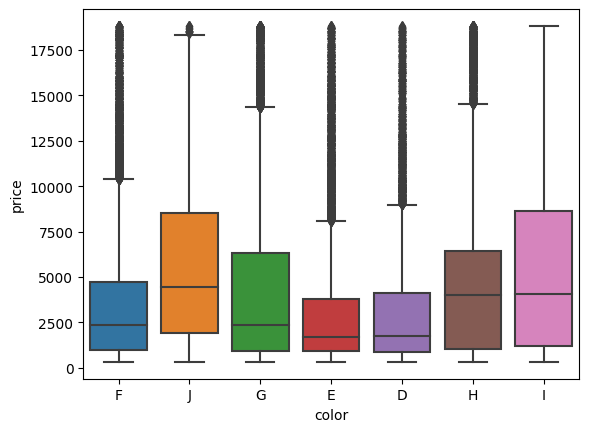

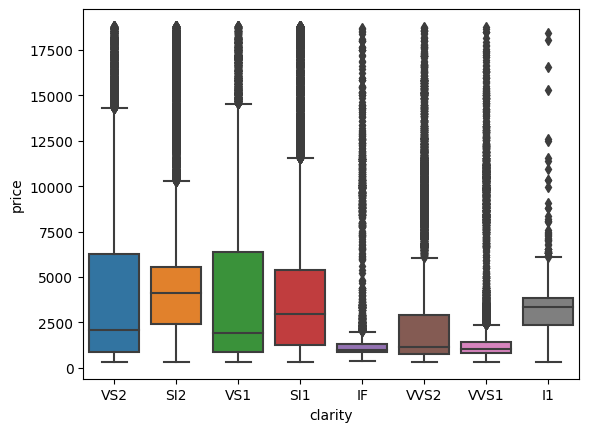

In [34]:
for i in categorical_columns:
    sns.boxplot(data=df, x=i, y='price')
    plt.show()

#### Oridinal Mapping of Caetgorical Features

It is observed that the categorical variables 'cut', 'color' and 'clarity' are ordinal in nature

Check this link for details : American Gem Society:- https://www.americangemsociety.org/ags-diamond-grading-system/

Creating Mapper for each categorical features

In [35]:
cut_mapper = {"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}
clarity_mapper = {"I1":1, "SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_mapper = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

##### Applying the mapper to the dataframe

In [36]:
df['cut'] = df['cut'].replace(cut_mapper)
df['clarity'] = df['clarity'].replace(clarity_mapper)
df['color'] = df['color'].replace(color_mapper)

In [37]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


#### Mutual Information Score

##### Separating X and y

In [38]:
X = df.drop(columns=['price'], axis=1)
y = df['price']

##### Calculating Mutual Information scores for regression

In [39]:
from sklearn.feature_selection import  mutual_info_regression
mi_scores = mutual_info_regression(X, y.values.flatten(), random_state=42)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [44]:
import numpy as np

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.show()

##### Visualizing Mutual Information Scores

carat      1.825115
x          1.674011
y          1.666632
z          1.615992
clarity    0.397911
color      0.285518
table      0.109664
cut        0.092104
depth      0.045643
Name: MI Scores, dtype: float64


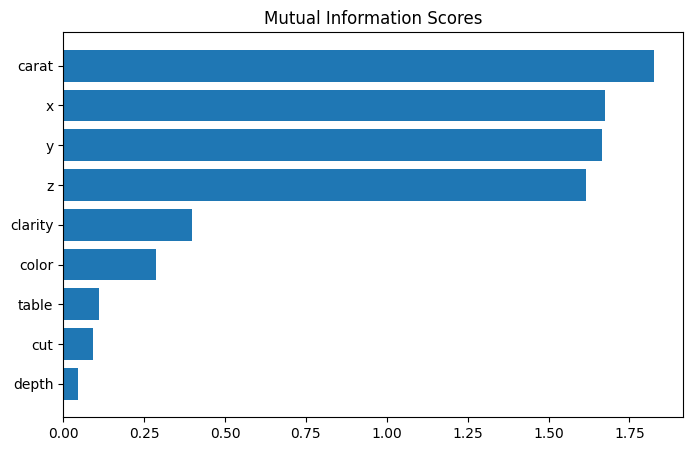

In [45]:
print(mi_scores)
plt.figure(dpi=100, figsize=(8,5))
plot_mi_scores(mi_scores)

##### Observations:-
- Above chart show that carat and x, y, z are the most important features to predict the price of a gemstone.